In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import kurtosis

I began by just loading the data and inspecting it for any interesting phenomena and transforming any relevant features into something usable for ML purposes

In [3]:
df = pd.read_excel('data_for_mle_test.xlsx')

In [4]:
df.isna().values.any()

False

In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,89,90,91,92,93,94,95,96,97,98
0,2015-01-16,-0.37,4770.29,45.75,-1.55,0.92,0.4670,0.0005,0,0,...,-0.128111,-17.791333,10.305394,-23.552000,-12.621939,-5.136000,0.051495,-0.036100,-3.445833,-0.000866
1,2015-01-19,-0.07,4770.29,44.74,-1.01,0.85,0.4485,-0.0185,0,0,...,-0.131918,5.756667,12.509394,0.850000,9.382727,-8.883333,0.064012,-0.006814,-2.558333,-0.005210
2,2015-01-20,-0.03,4770.29,44.56,-0.18,0.82,0.4480,-0.0005,0,0,...,-0.136045,15.043333,11.798182,-2.100000,21.214848,-5.626667,0.065991,-0.005639,1.391667,-0.002345
3,2015-01-21,0.00,4770.29,45.57,1.01,0.82,0.4530,0.0050,1,0,...,-0.143820,17.942000,12.504909,2.112667,19.562909,-10.884000,0.067230,-0.001111,1.554167,-0.002517
4,2015-01-22,0.04,4770.29,45.07,-0.50,0.86,0.4505,-0.0025,0,1,...,-0.150817,23.756667,12.065152,10.870667,25.691152,-10.130667,0.069817,0.003002,-1.441667,-0.002611


In [6]:
df['date_delta'] = (df['Unnamed: 0'] - df['Unnamed: 0'].min())  / np.timedelta64(1,'D')
x = df['date_delta'].values

df['up_or_down'] = np.asarray(df[0]>0, dtype=float)

In [7]:
x

array([   0.,    3.,    4., ..., 2173., 2174., 2175.])

I took a quick look at the thing I'm trying to predict

Text(0.5, 0, 'time since beginning')

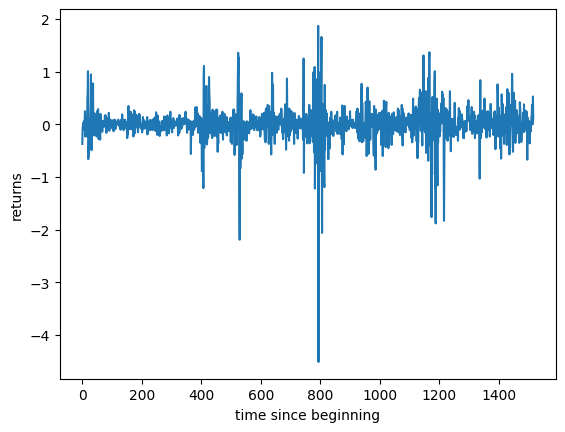

In [8]:
plt.plot(df[0])
plt.ylabel('returns')
plt.xlabel('time since beginning')

In [9]:
df = df.drop(columns=['Unnamed: 0'])

Let's take a look at how many unique entries exist for each feature. Should be a quick way of identifying whether or not we're dealing with mostly categorical or continuous data

Text(0, 0.5, 'number of unique entries')

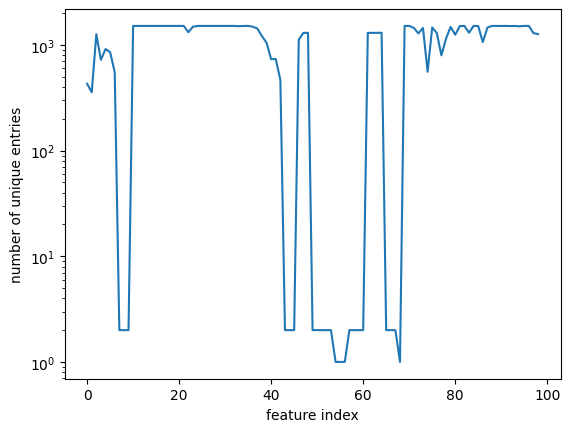

In [10]:
number_of_unique_possibilities = []

for i in range(99):
    number_of_unique_possibilities.append(len(np.unique(df[i] )))
plt.plot(number_of_unique_possibilities)
plt.yscale('log')
plt.xlabel('feature index')
plt.ylabel('number of unique entries')

In [55]:
df_train.shift(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,date_delta,up_or_down
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.37,4770.29,45.75,-1.55,0.92,0.46700,0.00050,0.0,0.0,1.0,...,10.305394,-23.552000,-12.621939,-5.136000,0.051495,-0.036100,-3.445833,-0.000866,0.0,0.0
3,-0.07,4770.29,44.74,-1.01,0.85,0.44850,-0.01850,0.0,0.0,0.0,...,12.509394,0.850000,9.382727,-8.883333,0.064012,-0.006814,-2.558333,-0.005210,3.0,0.0
4,-0.03,4770.29,44.56,-0.18,0.82,0.44800,-0.00050,0.0,0.0,0.0,...,11.798182,-2.100000,21.214848,-5.626667,0.065991,-0.005639,1.391667,-0.002345,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,0.13,1340.35,41.95,0.10,0.29,0.42950,0.00325,1.0,1.0,1.0,...,27.089455,0.668000,6.221455,-0.898000,0.284292,0.022379,0.554167,0.059927,1512.0,1.0
1057,0.10,1340.35,41.57,-0.38,0.39,0.42450,-0.00500,0.0,1.0,0.0,...,29.356788,3.905333,5.727455,-1.282000,0.239513,-0.039973,0.125000,0.186681,1515.0,1.0
1058,-0.13,1340.35,40.73,-0.84,0.26,0.41000,-0.01450,0.0,0.0,0.0,...,38.977212,36.672667,15.867879,-2.622000,0.222399,-0.067274,-0.337500,0.064236,1516.0,0.0
1059,-0.01,1340.35,39.26,-1.47,0.25,0.39225,-0.01775,0.0,0.0,0.0,...,35.315879,9.067333,6.459879,-0.335333,0.229407,-0.063191,1.258333,0.065096,1517.0,0.0


In [56]:
df_train.columns

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
                 20,           21,           22,           23,           24,
                 25,           26,           27,           28,           29,
                 30,           31,           32,           33,           34,
                 35,           36,           37,           38,           39,
                 40,           41,           42,           43,           44,
                 45,           46,           47,           48,           49,
                 50,           51,           52,           53,           57,
                 58,           59,           60,           61,           62,
                 63,           64,           65,           66,           67,

In [93]:
from sklearn.feature_selection import mutual_info_regression

mutual_infos_unlagged = []
mutual_infos_one_lagged = []
mutual_infos_two_lagged = []
mutual_infos_three_lagged = []
mutual_infos_four_lagged = []
mutual_infos_five_lagged = []
mutual_infos_six_lagged = []


for col_name in df_train.columns:
    mutual_info = mutual_info_regression(np.asarray(df_train[col_name]).reshape(-1,1), np.asarray(df_train[4]) )[0]
    mutual_infos_unlagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-1]).reshape(-1,1), df_train[4][1:])[0]
    mutual_infos_one_lagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-2]).reshape(-1,1), df_train[4][2:])[0]
    mutual_infos_two_lagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-3]).reshape(-1,1), df_train[4][3:])[0]
    mutual_infos_three_lagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-4]).reshape(-1,1), df_train[4][4:])[0]
    mutual_infos_four_lagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-5]).reshape(-1,1), df_train[4][5:])[0]
    mutual_infos_five_lagged.append(mutual_info)
    
    mutual_info = mutual_info_regression( np.asarray(df_train[col_name][0:df_train.shape[0]-6]).reshape(-1,1), df_train[4][6:])[0]
    mutual_infos_six_lagged.append(mutual_info)
    

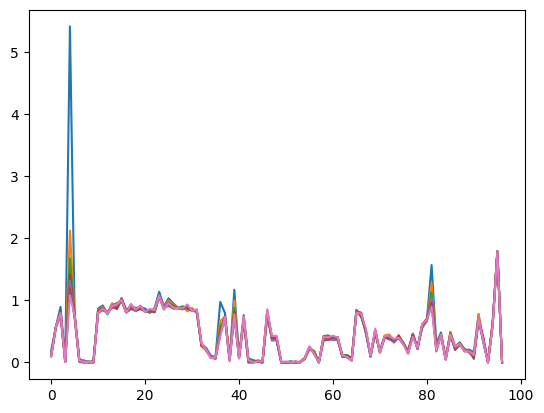

In [94]:
mutual_infos_unlagged = np.asarray(mutual_infos_unlagged)
mutual_infos_one_lagged = np.asarray(mutual_infos_one_lagged)
mutual_infos_two_lagged = np.asarray(mutual_infos_two_lagged)
mutual_infos_three_lagged = np.asarray(mutual_infos_three_lagged)
mutual_infos_four_lagged = np.asarray(mutual_infos_four_lagged)
mutual_infos_five_lagged = np.asarray(mutual_infos_five_lagged)
mutual_infos_six_lagged = np.asarray(mutual_infos_six_lagged)


plt.plot(mutual_infos_unlagged)
plt.plot(mutual_infos_one_lagged)
plt.plot(mutual_infos_two_lagged)
plt.plot(mutual_infos_three_lagged)
plt.plot(mutual_infos_four_lagged)
plt.plot(mutual_infos_five_lagged)
plt.plot(mutual_infos_six_lagged)

#plt.hist(mutual_infos_one_lagged)
#plt.hist(mutual_infos_two_lagged)


(array([32., 11., 15.,  7., 23.,  5.,  2.,  0.,  0.,  2.]),
 array([0.        , 0.17866711, 0.35733423, 0.53600134, 0.71466845,
        0.89333556, 1.07200268, 1.25066979, 1.4293369 , 1.60800402,
        1.78667113]),
 <BarContainer object of 10 artists>)

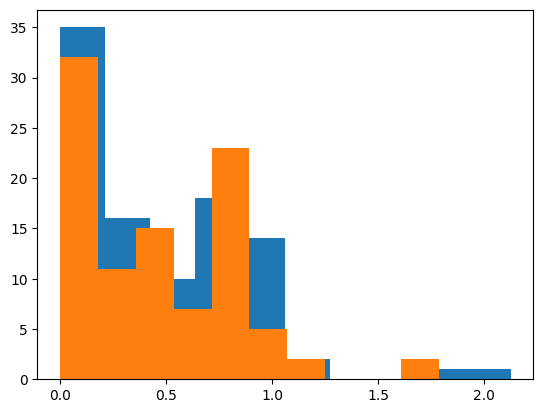

In [96]:
plt.hist(mutual_infos_one_lagged)
plt.hist(mutual_infos_two_lagged)

In [97]:
print(np.where(mutual_infos_one_lagged>1))
print(np.where(mutual_infos_two_lagged>1))
print(np.where(mutual_infos_three_lagged>1))
print(np.where(mutual_infos_four_lagged>1))
print(np.where(mutual_infos_five_lagged>1))
print(np.where(mutual_infos_six_lagged>1))


(array([ 4, 23, 81, 95]),)
(array([ 4, 15, 23, 81, 95]),)
(array([ 4, 15, 23, 81, 95]),)
(array([ 4, 23, 81, 95]),)
(array([ 4, 23, 95]),)
(array([ 4, 15, 23, 95]),)


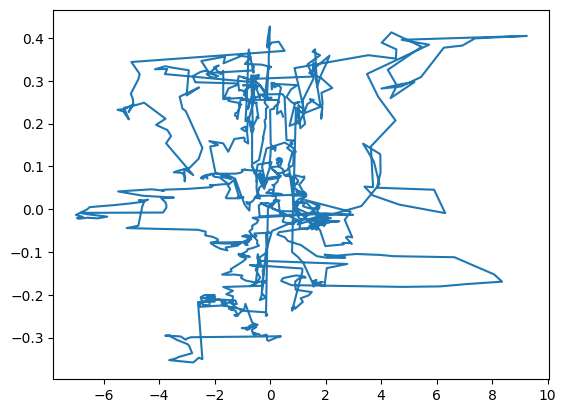

In [103]:
plt.plot(df_train[4], df_train.shift(1)[95])

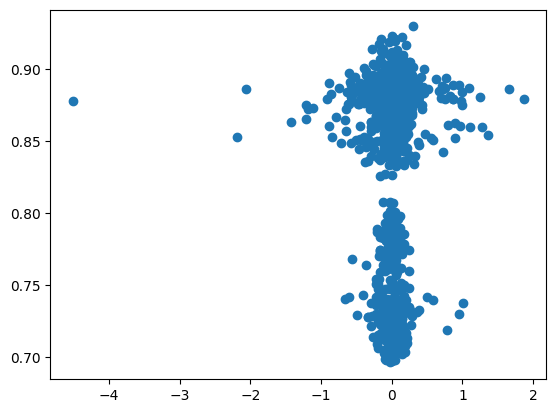

In [92]:
plt.scatter(df_train[0],df_train[83])

In [69]:
mutual_infos_one_lagged

[4.249182574407757,
 0.05679051102535393,
 0.06532464538589444,
 0.2946459031922277,
 0.17913014827675733,
 0.025987165310789706,
 0.1635037612969823,
 0.13774202100102828,
 0.6787547997114003,
 0.12115563452867129,
 0.02921254964165776,
 0.04151424270588233,
 0.03814528991018795,
 0.03667576208412582,
 0.04711733330108103,
 0.028904557440299072,
 0.028290838478284286,
 0.04474643941455758,
 0.011235438037409118,
 0.06776876851376024,
 0.019676434478092197,
 0.01922477557523461,
 0,
 0.03116713733858889,
 0.07198652664269467,
 0.04077741992200146,
 0.03742197968291361,
 0.05159032178243139,
 0.009828144026323926,
 0.0511886641871766,
 0.017006566259444966,
 0.03651485235108609,
 0.013007510998415128,
 0.016329748717931025,
 0.01360523230240318,
 0.04494892891577962,
 0.056622670942794606,
 0,
 0.1810362072395062,
 0.10029802120638243,
 0.3044386516231099,
 0.017317103697156888,
 0.10935159023865415,
 0.07722698917659665,
 0.08149934780394075,
 0.06187698402411357,
 0.04574545620863457,

There's a few features with just 1 unique value. Probably completely useless?

In [11]:
df[np.where(np.asarray(number_of_unique_possibilities)==1)[0]]

,54,55,56,68
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1512,0,0,0,0
1513,0,0,0,0
1514,0,0,0,0
1515,0,0,0,0


In [12]:
df = df.drop(columns = np.where(np.asarray(number_of_unique_possibilities)==1)[0])

In [13]:
np.where(np.asarray(number_of_unique_possibilities)>10)[0]

array([ 0,  1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 46, 47, 48, 61, 62, 63, 64, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98])

In [14]:
n = len(df)
df_train = df[0:int(n*0.7)]

df_val = df[int(n*0.7):int(n*0.8)]
df_test = df[int(n*0.8):]

num_features = df.shape[1]

In [15]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,date_delta,up_or_down
0,-0.37,4770.29,45.75,-1.55,0.92,0.46700,0.00050,0,0,1,...,10.305394,-23.552000,-12.621939,-5.136000,0.051495,-0.036100,-3.445833,-0.000866,0.0,0.0
1,-0.07,4770.29,44.74,-1.01,0.85,0.44850,-0.01850,0,0,0,...,12.509394,0.850000,9.382727,-8.883333,0.064012,-0.006814,-2.558333,-0.005210,3.0,0.0
2,-0.03,4770.29,44.56,-0.18,0.82,0.44800,-0.00050,0,0,0,...,11.798182,-2.100000,21.214848,-5.626667,0.065991,-0.005639,1.391667,-0.002345,4.0,0.0
3,0.00,4770.29,45.57,1.01,0.82,0.45300,0.00500,1,0,1,...,12.504909,2.112667,19.562909,-10.884000,0.067230,-0.001111,1.554167,-0.002517,5.0,0.0
4,0.04,4770.29,45.07,-0.50,0.86,0.45050,-0.00250,0,1,0,...,12.065152,10.870667,25.691152,-10.130667,0.069817,0.003002,-1.441667,-0.002611,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,-0.13,1340.35,40.73,-0.84,0.26,0.41000,-0.01450,0,0,0,...,38.977212,36.672667,15.867879,-2.622000,0.222399,-0.067274,-0.337500,0.064236,1516.0,0.0
1057,-0.01,1340.35,39.26,-1.47,0.25,0.39225,-0.01775,0,0,0,...,35.315879,9.067333,6.459879,-0.335333,0.229407,-0.063191,1.258333,0.065096,1517.0,0.0
1058,0.14,1340.35,38.80,-0.46,0.39,0.38800,-0.00425,0,1,0,...,27.682242,-11.206667,8.025576,2.530000,0.218595,-0.076559,1.733333,0.065868,1518.0,1.0
1059,0.07,1340.35,37.58,-1.22,0.46,0.38175,-0.00625,0,1,0,...,24.027394,-13.588000,0.872061,4.864000,0.216263,-0.063648,0.000000,0.066553,1519.0,1.0


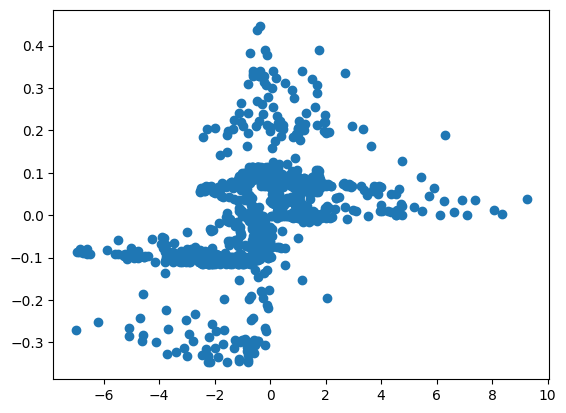

In [42]:
plt.scatter(df_train[4], df_train[98])

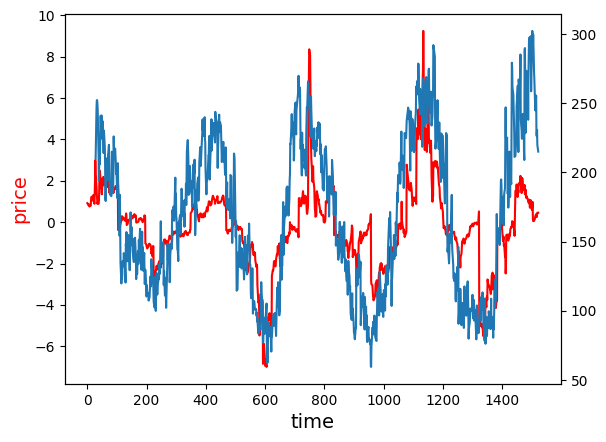

In [114]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df_train['date_delta'],
        df_train[4],color='red')
# set x-axis label
ax.set_xlabel("time", fontsize = 14)
# set y-axis label
ax.set_ylabel("price",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_train['date_delta'], df_train.shift(20)[81])

plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

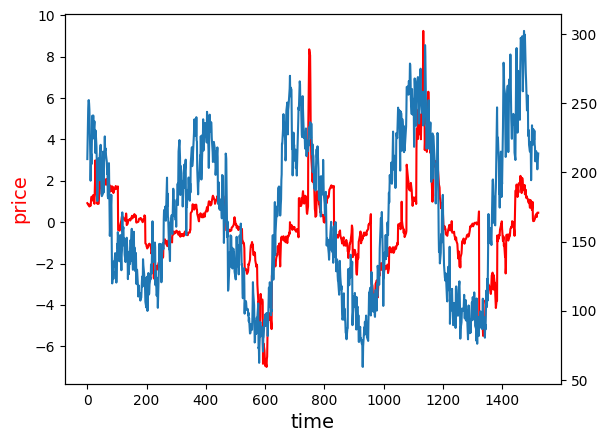

In [117]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df_train['date_delta'],
        df_train[4],color='red')
# set x-axis label
ax.set_xlabel("time", fontsize = 14)
# set y-axis label
ax.set_ylabel("price",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_train['date_delta'], df_train[81])

plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

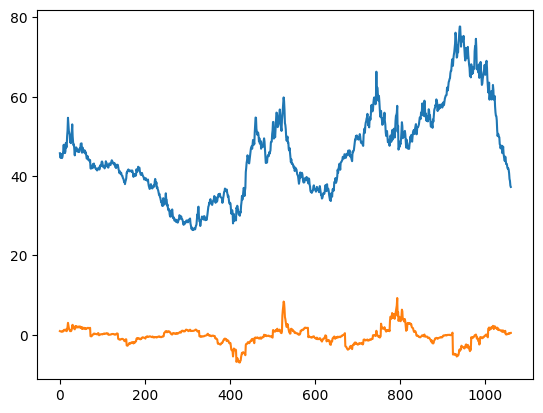

In [22]:
fig,ax=plt.subplots()
ax.plot(df_train['date_delta'], df_train[4], marker="o")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.plot(gapminder_us.year, gapminder_us["gdpPercap"], marker="o")
plt.show()

plt.plot(df_train[2])
plt.plot(df_train[4])

If I circle back to column name 4, I notice quickly that it seems like the df[4][t]-df[4][t-1] == df[0][t]. Let's see if this is always the case.

In [33]:
train_mean = df_train.mean()
train_std = df_train.std()

df_train_ss = (df_train - train_mean) / train_std
df_val_ss = (df_val - train_mean) / train_std
df_test_ss = (df_test - train_mean) / train_std

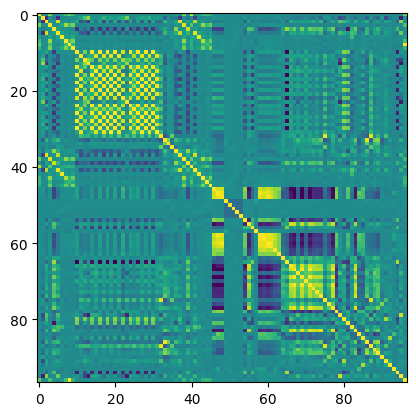

In [35]:
plt.imshow(np.cov(df_train_ss.T))

In [ ]:
df_tra

In [38]:
np.cov(df_train_ss.T)[2]

array([ 0.00736926, -0.6873598 ,  1.        ,  0.03989974,  0.01468951,
        0.87972992,  0.00986989,  0.07963492, -0.00538766,  0.07032284,
        0.22328039, -0.39829339, -0.30306345, -0.64575168,  0.16535571,
       -0.19077822,  0.17501495, -0.51036085,  0.20000876, -0.31340902,
        0.20610701, -0.45028422,  0.05788689, -0.44316114,  0.21369056,
       -0.22429285,  0.16029048, -0.36910718,  0.1487421 , -0.51900557,
        0.20564855, -0.28140253, -0.24781731,  0.33151378,  0.03411327,
        0.04714031,  0.18542986,  0.91259402,  0.06310034,  0.230291  ,
        0.01449972,  0.79037355,  0.01042053,  0.10135896, -0.01465008,
        0.08341771, -0.12382919, -0.12248478, -0.1103247 ,  0.00393091,
       -0.01434602, -0.00455449,  0.00344799,  0.01154573, -0.30560503,
        0.16290254, -0.19012553, -0.01941041, -0.1046722 , -0.08892227,
       -0.09131717, -0.07353492, -0.09212214, -0.10511754,  0.0723865 ,
       -0.26750368,  0.24455075,  0.16395737,  0.10027081,  0.16

Text(0, 0.5, 'df[4] <- maybe price?')

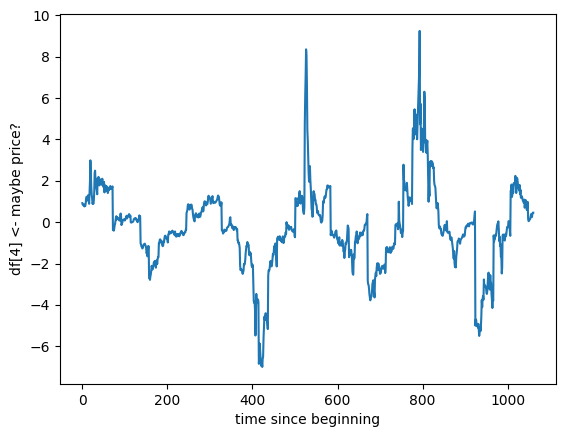

In [17]:
plt.plot(df_train[4])
plt.xlabel('time since beginning')
plt.ylabel('df[4] <- maybe price?')

Not always, but about 97 percent of the time. It also seems as though df[4] is more predictable than df[0]. There seems to be some periodicity and smoothness to it. So let's turn our attention to trying to predict df[4]

In [18]:
df_train_categorical = df_train[np.where(np.asarray(number_of_unique_possibilities)==2)[0]]
df_train_continuous = df_train[np.where(np.asarray(number_of_unique_possibilities)>10)[0]]

df_test_categorical = df_test[np.where(np.asarray(number_of_unique_possibilities)==2)[0]]
df_test_continuous = df_test[np.where(np.asarray(number_of_unique_possibilities)>10)[0]]

df_val_categorical = df_val[np.where(np.asarray(number_of_unique_possibilities)==2)[0]]
df_val_continuous = df_val[np.where(np.asarray(number_of_unique_possibilities)>10)[0]]



array([ 8.13724489e-01,  5.53724715e-01,  9.20793019e-03,  2.57982294e-01,
        4.45971783e-02,  5.02462531e-02,  5.97178316e-02,  9.90375495e-02,
        1.02794653e-01,  1.26338204e-01,  1.53410698e-01,  2.28728973e-01,
        2.05072542e-01,  1.97258034e-01,  1.99616856e-01,  2.01901036e-01,
       -4.57514479e-16, -2.61039578e-16])

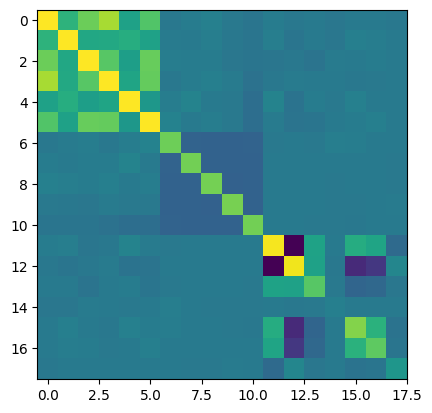

In [19]:
plt.imshow(np.cov(df_train_categorical.T))

np.linalg.eig(np.cov(df_train_categorical.T))[0]

Notably, there's two categorical features that are almost exactly opposite of one another. The features have some correlation otherwise, but it's nothing too strong. Hard to really suggest a simple transformation for this. Let's go ahead and just standardize and focus on the continuous variables

In [20]:
train_mean = df_train_continuous.mean()
train_std = df_train_continuous.std()

df_train_continuous = (df_train_continuous - train_mean) / train_std
df_val_continuous = (df_val_continuous - train_mean) / train_std
df_test_continuous = (df_test_continuous - train_mean) / train_std

I'm going to start by making a few plots of df[4] vs df[0], to see if there's any structure there. As mentioned earlier, it looked like df[4] had some periodicity to it, so if circles start showing up in this plot, we know the data can be modeled with a spring with damping

Text(0.5, 0, 'price')

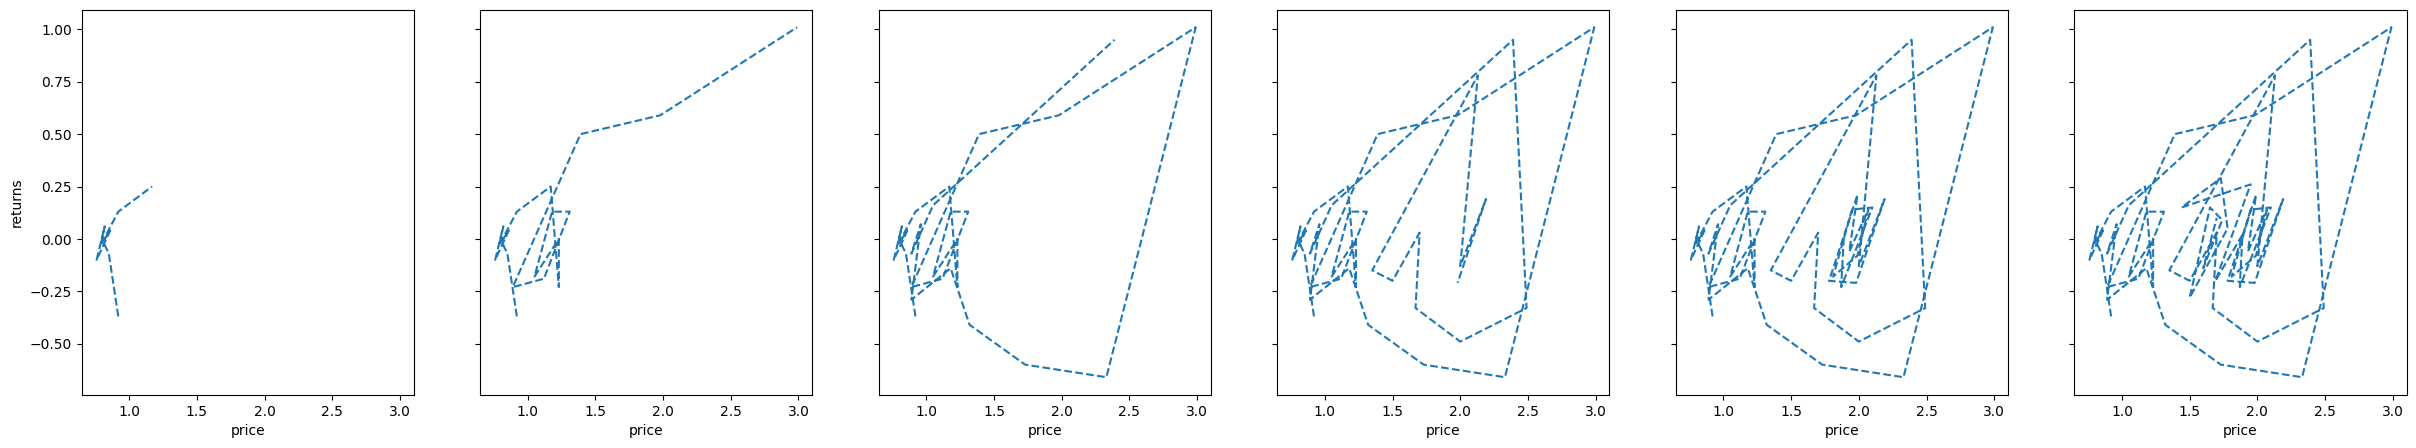

In [21]:
fig, axs = plt.subplots(1,6, sharex=True, sharey=True)
fig.set_size_inches(30,5)
axs[0].set_ylabel('returns')
axs[0].plot(df_train[4][:10], df_train[0][:10], '--')
axs[0].set_xlabel('price')
axs[1].plot(df_train[4][:20], df_train[0][:20], '--')
axs[2].plot(df_train[4][:30], df_train[0][:30], '--')
axs[3].plot(df_train[4][:40], df_train[0][:40], '--')
axs[4].plot(df_train[4][:50], df_train[0][:50], '--')
axs[5].plot(df_train[4][:60], df_train[0][:60], '--')

axs[1].set_xlabel('price')
axs[2].set_xlabel('price')
axs[3].set_xlabel('price')
axs[4].set_xlabel('price')
axs[5].set_xlabel('price')

Text(0.5, 0, 'price')

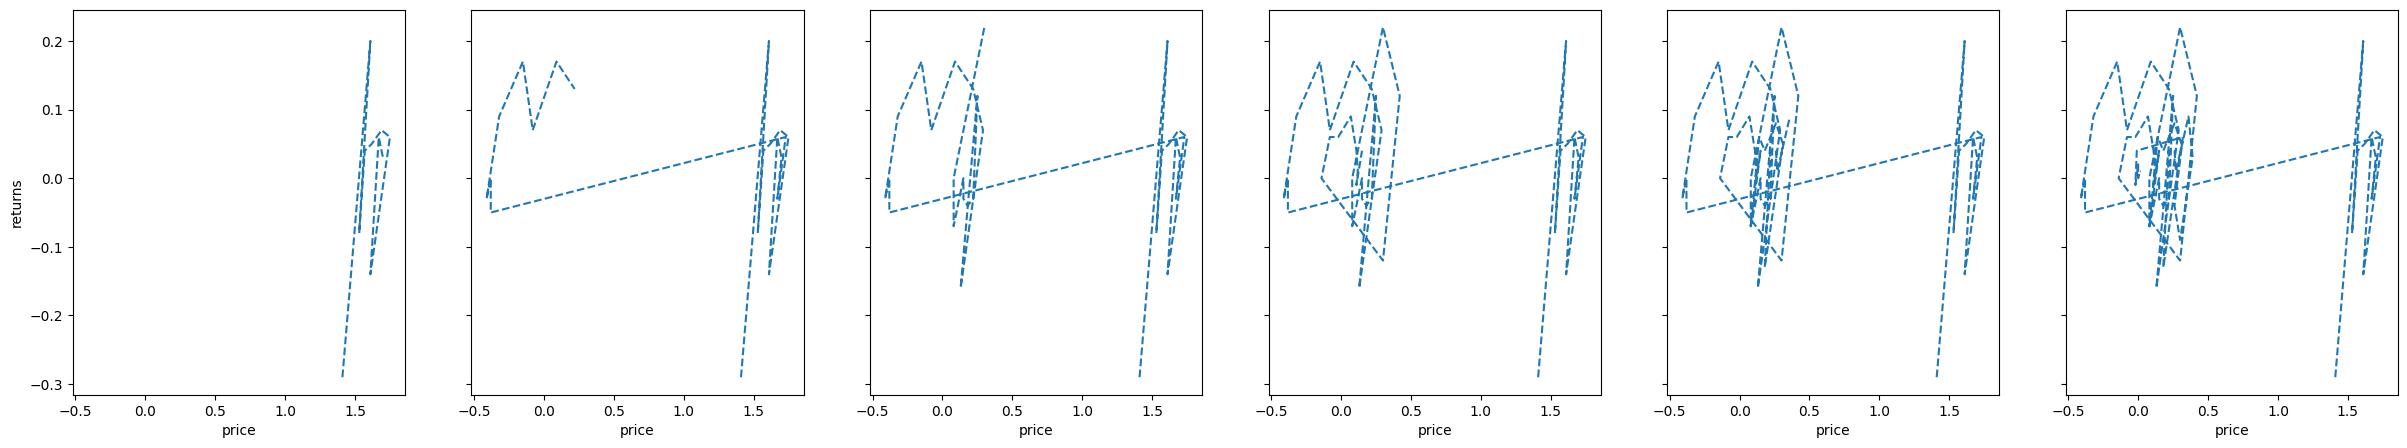

In [22]:
fig, axs = plt.subplots(1,6, sharex=True, sharey=True)
fig.set_size_inches(30,5)
axs[0].plot(df_train[4][60:70], df_train[0][60:70], '--')
axs[1].plot(df_train[4][60:80], df_train[0][60:80], '--')
axs[2].plot(df_train[4][60:90], df_train[0][60:90], '--')
axs[3].plot(df_train[4][60:100], df_train[0][60:100], '--')
axs[4].plot(df_train[4][60:110], df_train[0][60:110], '--')
axs[5].plot(df_train[4][60:120], df_train[0][60:120], '--')
axs[0].set_ylabel('returns')

axs[0].set_xlabel('price')
axs[1].set_xlabel('price')
axs[2].set_xlabel('price')
axs[3].set_xlabel('price')
axs[4].set_xlabel('price')
axs[5].set_xlabel('price')

Text(0, 0.5, 'Autocorrelation')

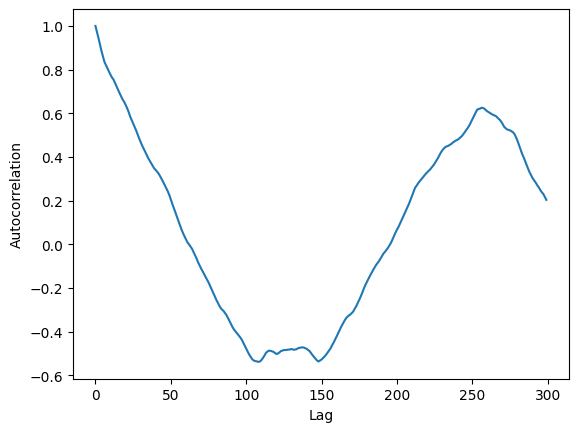

In [23]:
values = pd.DataFrame(df_train[4])
 
# using shift function to shift the values.
dataframe = pd.concat([values.shift(250-i) for i in range(300)], axis=1)
# naming the columns
dataframe.columns = ['t+{}'.format(i) for i in range(300)]
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
plt.plot(range(300), result['t+0'])

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')


It looks like there are a few loops that emerge. In addition, the autocorrelation of df[4] is somewhat periodic. Some small, some large. Maybe I can produce a simple regressor that emerges from the fourier frequencies of the training dataset and a linear combination of the cosine waves

/var/folders/t5/hglcpfcd3px36gr5wgd_4mtm0000gn/T/ipykernel_4727/4228166511.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(xf, 1/xf)


Text(0, 0.5, 'Magnitude')

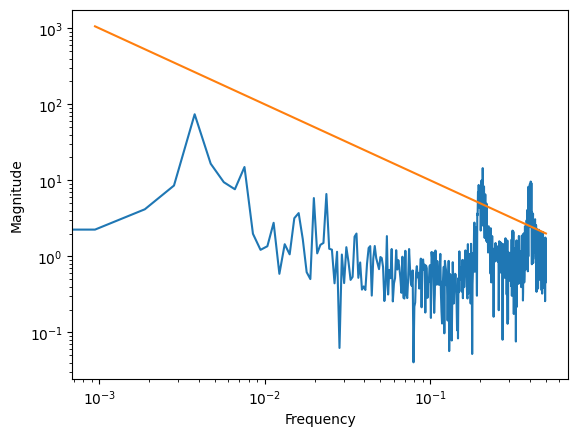

In [43]:
from scipy.fft import rfft,rfftfreq
n    = len(df_train[98])
yf   = rfft(np.asarray(df_train[98]))
xf   = rfftfreq(n,1)
plt.plot(xf,np.abs(yf))
plt.xscale('log')
plt.yscale('log')
plt.plot(xf, 1/xf)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

/var/folders/t5/hglcpfcd3px36gr5wgd_4mtm0000gn/T/ipykernel_49983/359973831.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(xf, 1/xf)


Text(0, 0.5, 'Magnitude')

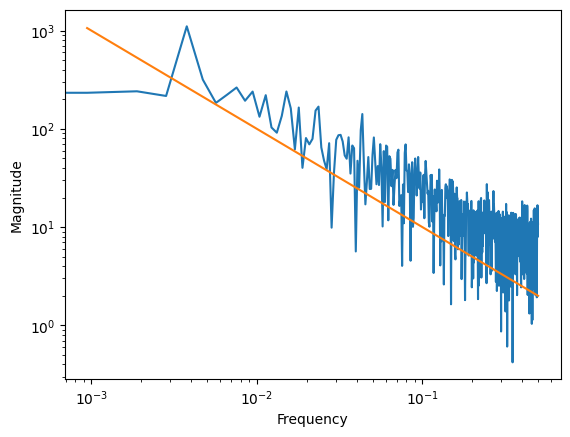

In [25]:
from scipy.fft import rfft,rfftfreq
n    = len(df_train[4])
yf   = rfft(np.asarray(df_train[4]))
xf   = rfftfreq(n,1)
plt.plot(xf,np.abs(yf))
plt.xscale('log')
plt.yscale('log')
plt.plot(xf, 1/xf)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

The fourier frequencies fall off as 1/f, suggesting the model is somewhere between a brownian process and a random walk. I think these might be typically solved with autoregressive processes

Text(0, 0.5, 'Magnitude')

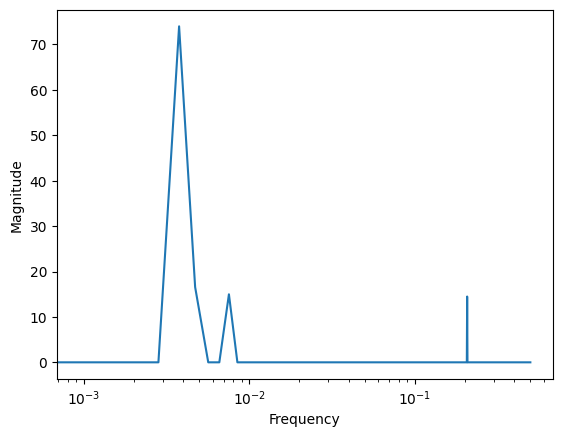

In [44]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>10   # filter out those value under 100
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))
plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

In [27]:
df_train[4].shape

(1061,)

0.7017663701588569


Text(0, 0.5, 'Price')

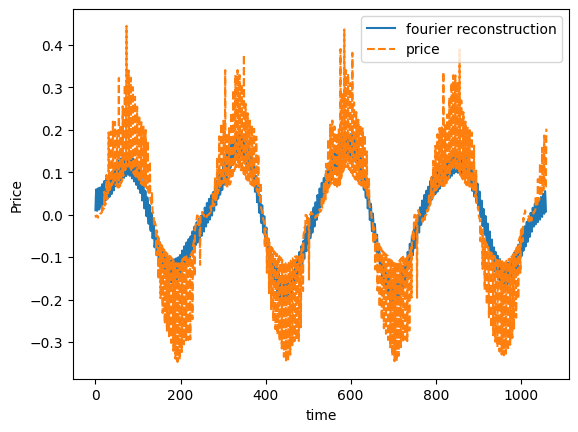

In [45]:
from scipy.fft import irfft
new_f_clean = irfft(yf_clean)
plt.plot(new_f_clean, label='fourier reconstruction')
#plt.ylim(-6,8)
plt.plot(df_train[98], ls='--', label='price')
print(1-np.sum((new_f_clean-df_train[98][:1060])**2)/np.sum((np.mean(df_train[98])-df_train[98])**2))
plt.legend()
plt.xlabel('time')
plt.ylabel('Price')

In [50]:
frequencies_for_fitting = xf[yf>10]



In [51]:
cosine_wave_times_train.shape

(1061, 532)

In [52]:


cosine_wave_times_train = np.zeros((df_train['date_delta'].shape[0], frequencies_for_fitting.shape[0]))

for index, freq in enumerate(frequencies_for_fitting):
    cosine_wave_times_train[:,index] = np.cos(2*np.pi*freq * df_train['date_delta'])
    
cosine_wave_times_train = np.concatenate((cosine_wave_times_train, np.asarray(df_train[4]).reshape(df_train[4].shape[0],1)), axis=1)
        
#frequencies_for_fitting = np.arange(0.005,0.1, 0.01)

cosine_wave_times_test = np.zeros((df_test['date_delta'].shape[0], frequencies_for_fitting.shape[0]))

for index, freq in enumerate(frequencies_for_fitting):
    cosine_wave_times_test[:,index] = np.cos(2*np.pi * freq * df_test['date_delta'])
    
cosine_wave_times_test = np.concatenate((cosine_wave_times_test, np.asarray(df_test[4]).reshape(df_test[4].shape[0],1)), axis=1)

    
cosine_wave_times_val = np.zeros((df_val['date_delta'].shape[0], frequencies_for_fitting.shape[0]))

for index, freq in enumerate(frequencies_for_fitting):
    cosine_wave_times_val[:,index] = np.cos(2*np.pi * freq * df_val['date_delta'])
                              
        
cosine_wave_times_val = np.concatenate((cosine_wave_times_val, np.asarray(df_val[4]).reshape(df_val[4].shape[0],1)), axis=1)


In [53]:
cosine_wave_times_train.shape

(1061, 2)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()


rf_regressor.fit(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], df_train[98][1:])
print(rf_regressor.score(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], df_train[98][1:]))
print(rf_regressor.score(cosine_wave_times_val[:cosine_wave_times_val.shape[0]-1], df_val[98][1:]))



0.8987558184779987
-0.5252270391836804


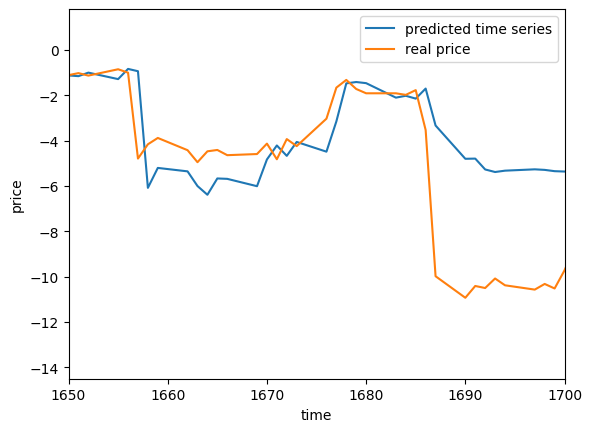

In [34]:
plt.plot(df_val['date_delta'][1:],rf_regressor.predict(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]-1]), label='predicted time series')
plt.plot(df_val['date_delta'],df_val[4], label='real price')
plt.xlim((1650,1700))
plt.xlabel('time')
plt.ylabel('price')
plt.legend()

In [35]:
df_val.shape

(152, 97)

In [36]:
delta_predictions = (rf_regressor.predict(cosine_wave_times_val) - df_val[4])

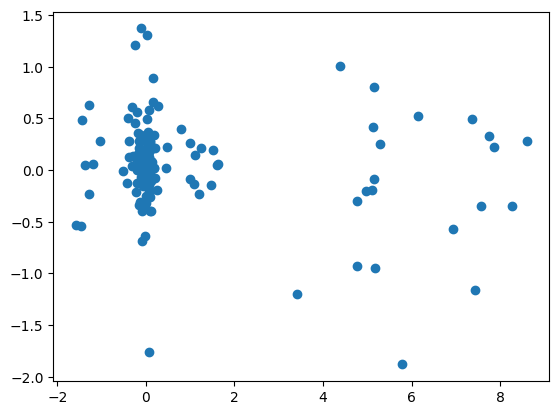

In [37]:
plt.scatter(delta_predictions[0:-1], df_val[0][1:])

In [38]:
np.corrcoef(delta_predictions[0:-1], df_val[0][1:])

array([[ 1.        , -0.17360194],
       [-0.17360194,  1.        ]])

In [39]:
plt.scatter(

SyntaxError: unexpected EOF while parsing (2504390526.py, line 1)

In [41]:
val_predictions_collated = rf_regressor.predict(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]])


returns = np.zeros(len(np.arange(-1,1,0.01)))
for index, cutoff in enumerate(np.arange(-1,1,0.01)):
    holdings = (np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float)-1/2)*2
    returns[index] = sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

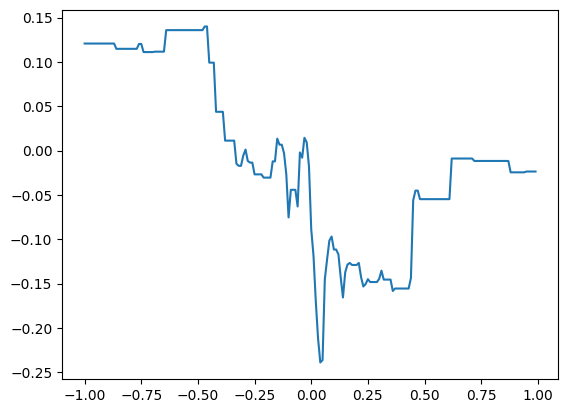

In [42]:
plt.plot(np.arange(-1,1,0.01), returns)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_regressor = RandomForestClassifier()


rf_regressor.fit(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], (df_train[0]>0)[1:])
print(rf_regressor.score(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], (df_train[0]>0)[1:]))
print(rf_regressor.score(cosine_wave_times_val[:cosine_wave_times_val.shape[0]-1], (df_val[0]>0)[1:]))


1.0
0.5165562913907285


In [46]:

rf_regressor = GradientBoostingRegressor()


rf_regressor.fit(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], df_train[4][1:])
print(rf_regressor.score(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], df_train[4][1:]))
print(rf_regressor.score(cosine_wave_times_val[:cosine_wave_times_val.shape[0]-1], df_val[4][1:]))


0.9883580897312393
0.658746426434891


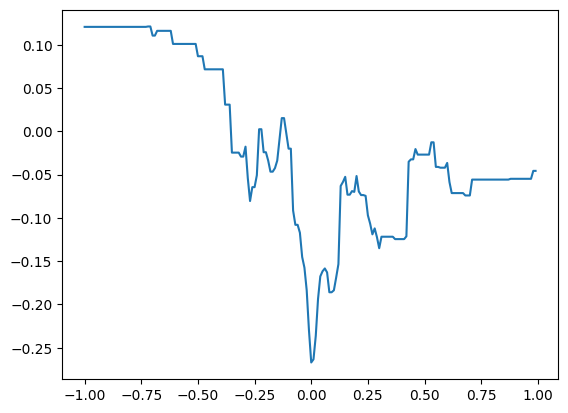

In [48]:
plt.plot(np.arange(-1,1,0.01), returns)

In [ ]:
plt.plot(np.arange(-1,1,0.01), returns)

In [49]:
val_predictions_collated = rf_regressor.predict(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]])


returns = np.zeros(len(np.arange(-1,1,0.01)))
for index, cutoff in enumerate(np.arange(-1,1,0.01)):
    holdings = (np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float)-1/2)*2
    returns[index] = sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
rf_regressor = GradientBoostingClassifier()


rf_regressor.fit(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], (df_train[0]>0)[1:])
print(rf_regressor.score(cosine_wave_times_train[:cosine_wave_times_train.shape[0]-1], (df_train[0]>0)[1:]))
print(rf_regressor.score(cosine_wave_times_val[:cosine_wave_times_val.shape[0]-1], (df_val[0]>0)[1:]))


0.8688679245283019
0.5629139072847682


In [55]:
from sklearn.metrics import classification_report
print(classification_report((df_val[0]>0)[1:],rf_regressor.predict(cosine_wave_times_val[:cosine_wave_times_val.shape[0]-1])))

              precision    recall  f1-score   support

       False       0.50      0.61      0.55        66
        True       0.63      0.53      0.58        85

    accuracy                           0.56       151
   macro avg       0.57      0.57      0.56       151
weighted avg       0.58      0.56      0.56       151



In [56]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.01)
lasso_regressor.fit(cosine_wave_times_train[0:cosine_wave_times_train.shape[0]-1], df_train[4][1:])
print(lasso_regressor.score(cosine_wave_times_train[0:cosine_wave_times_train.shape[0]-1], df_train[4][1:]))
print(lasso_regressor.score(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]-1], df_val[4][1:]))



0.9583453931535607
0.933219409494956


In [ ]:
plt.plot

In [58]:
from sklearn.linear_model import Ridge

lasso_regressor = Ridge(alpha=0.01)
lasso_regressor.fit(cosine_wave_times_train[0:cosine_wave_times_train.shape[0]-1], df_train[4][1:])
print(lasso_regressor.score(cosine_wave_times_train[0:cosine_wave_times_train.shape[0]-1], df_train[4][1:]))
print(lasso_regressor.score(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]-1], df_val[4][1:]))

0.9755473742621803
0.9280974238692247


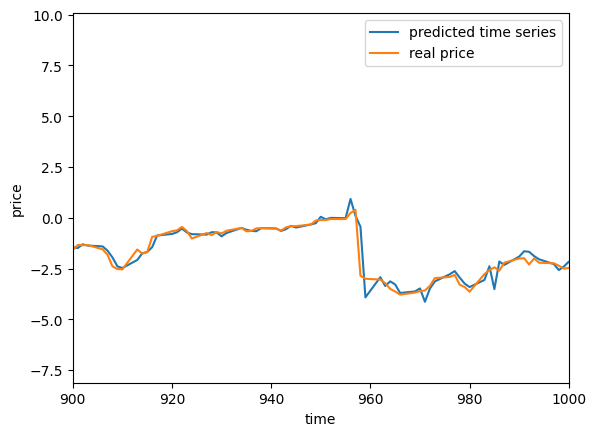

In [61]:
plt.plot(df_train['date_delta'][1:],lasso_regressor.predict(cosine_wave_times_train[0:cosine_wave_times_train.shape[0]-1]), label='predicted time series')
plt.plot(df_train['date_delta'],df_train[4], label='real price')
plt.xlim((900,1000))
plt.xlabel('time')
plt.ylabel('price')
plt.legend()

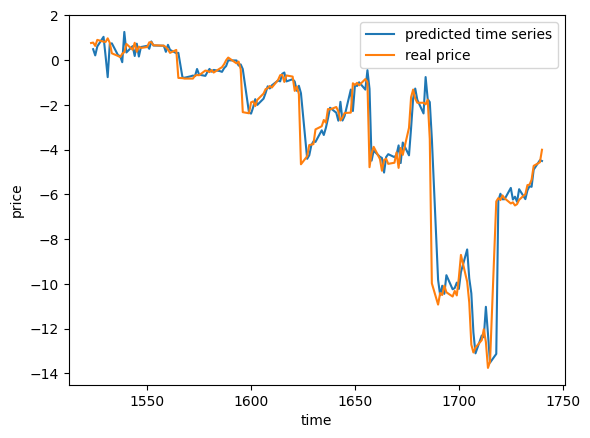

In [64]:
plt.plot(df_val['date_delta'][1:],lasso_regressor.predict(cosine_wave_times_val[0:cosine_wave_times_val.shape[0]-1]), label='predicted time series')
plt.plot(df_val['date_delta'],df_val[4], label='real price')
#plt.xlim((1650,1700))
plt.xlabel('time')
plt.ylabel('price')
plt.legend()

In [95]:
predictions = lasso_regressor.predict(cosine_wave_times_test)

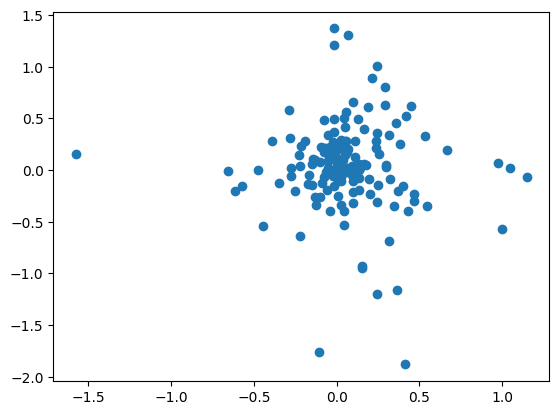

In [74]:
plt.scatter((predictions - df_val[4])[:151], df_val[0][1:])

In [76]:
np.corrcoef((predictions - df_val[4])[:151], df_val[0][1:])

array([[ 1.        , -0.05556627],
       [-0.05556627,  1.        ]])

Text(0, 0.5, 'price')

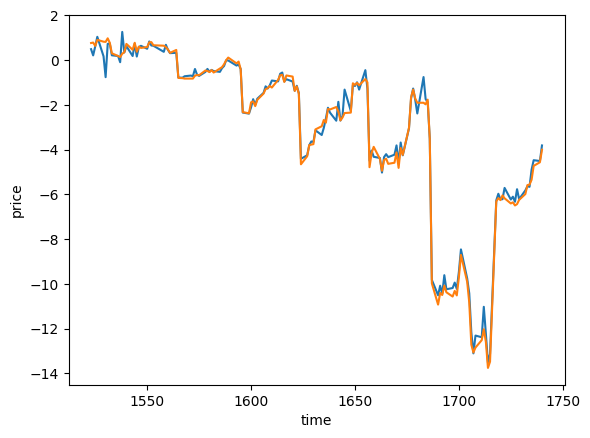

In [63]:
#plt.plot(df_train['date_delta'],lasso_regressor.predict(cosine_wave_times_train))
#plt.plot(df_train['date_delta'],df_train[4])

plt.plot(df_val['date_delta'],lasso_regressor.predict(cosine_wave_times_val), label='predicted time series')
plt.plot(df_val['date_delta'],df_val[4], label='real price')
#plt.xlim((1800,1900))
plt.xlabel('time')
plt.ylabel('price')

After taking a peek, it looks like my efforts to fit data with fourier modes didn't work too well. I'm somewhat surprised, but it could be that the relevant frequencies themselves are time varying, so such an approach wouldn't work. If I dynamically updated the weights of the cosine waves as a function of time, that might work, but I didn't have time to try this very carefully. I did, however, check to see if the regressor could be used as a classifier. That fails

              precision    recall  f1-score   support

       False       0.83      0.08      0.14        66
        True       0.58      0.99      0.73        85

    accuracy                           0.59       151
   macro avg       0.71      0.53      0.43       151
weighted avg       0.69      0.59      0.47       151

              precision    recall  f1-score   support

       False       0.43      0.97      0.60        66
        True       0.33      0.01      0.02        85

    accuracy                           0.43       151
   macro avg       0.38      0.49      0.31       151
weighted avg       0.38      0.43      0.27       151



Text(0, 0.5, 'True Positive Rate')

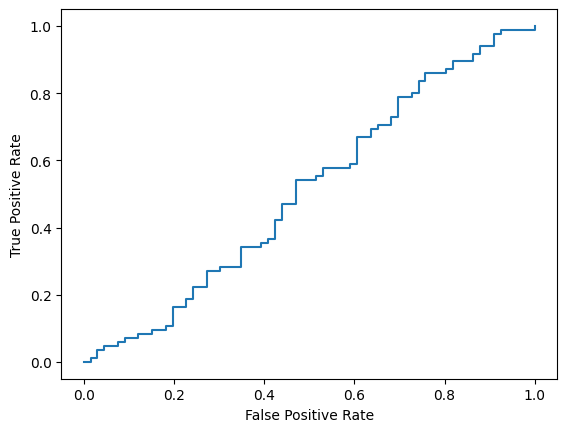

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, _ = roc_curve(df_val[0][1:]>0, (predictions - df_val[4])[:151])
print(classification_report(df_val[0][1:]>0, (predictions - df_val[4])[:151]>-0.4))
print(classification_report(df_val[0][1:]>0, (predictions - df_val[4])[:151]>))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [99]:
predictions.shape

(304,)

              precision    recall  f1-score   support

       False       0.44      0.03      0.05       139
        True       0.54      0.97      0.69       164

    accuracy                           0.54       303
   macro avg       0.49      0.50      0.37       303
weighted avg       0.50      0.54      0.40       303

              precision    recall  f1-score   support

       False       0.49      0.43      0.46       139
        True       0.56      0.62      0.59       164

    accuracy                           0.53       303
   macro avg       0.53      0.53      0.53       303
weighted avg       0.53      0.53      0.53       303



Text(0, 0.5, 'True Positive Rate')

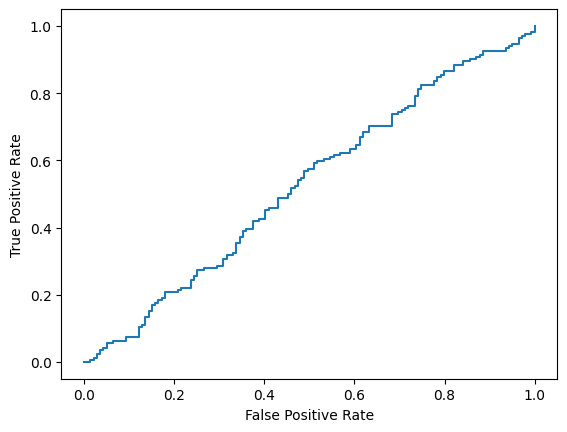

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, _ = roc_curve(df_test[0][1:]>0, (predictions - df_test[4])[:303])
print(classification_report(df_test[0][1:]>0, (predictions - df_test[4])[:303]>-0.4))
print(classification_report(df_test[0][1:]>0, (predictions - df_test[4])[:303]>0))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, _ = roc_curve((df_val[0][1:]>0), (np.diff(lasso_regressor.predict(cosine_wave_times_train))))
print(classification_report((df_val[0][1:]>0), (np.diff(lasso_regressor.predict(cosine_wave_times_train))>0)))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: Found input variables with inconsistent numbers of samples: [151, 1060]

              precision    recall  f1-score   support

       False       0.67      0.67      0.67       139
        True       0.72      0.73      0.72       164

    accuracy                           0.70       303
   macro avg       0.70      0.70      0.70       303
weighted avg       0.70      0.70      0.70       303



Text(0, 0.5, 'True Positive Rate')

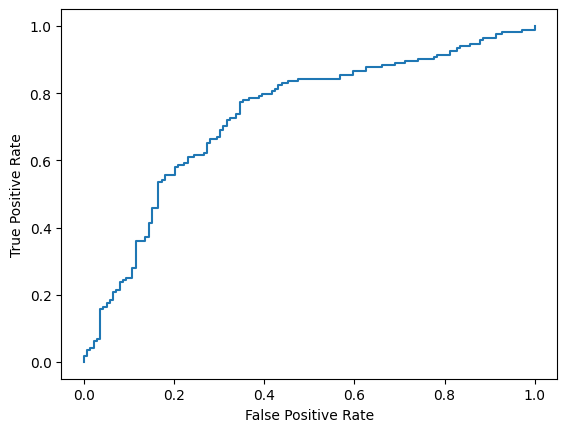

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, _ = roc_curve((df_test[0][1:]>0), (np.diff(lasso_regressor.predict(cosine_wave_times_test))))
print(classification_report((df_test[0][1:]>0), (np.diff(lasso_regressor.predict(cosine_wave_times_test))>0)))
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

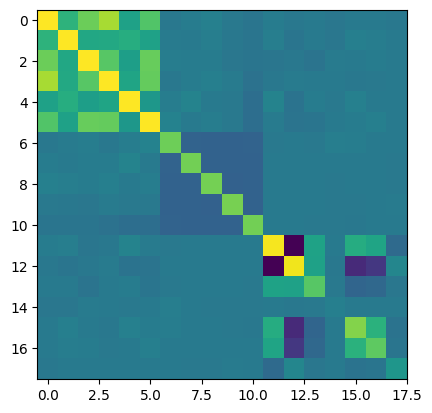

In [105]:
plt.imshow(np.cov(np.asarray(df_train_categorical).T))

In [106]:
df_train_categorical.head()

,7,8,9,43,44,45,49,50,51,52,53,57,58,59,60,65,66,67
0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [107]:
np.cov(np.asarray(df_train_categorical).T)[6][7]

-0.038835737022744746

I'm now going to turn my attention to looking at the feature variables and seeing if they're correlated, or if they need to be decorrelated

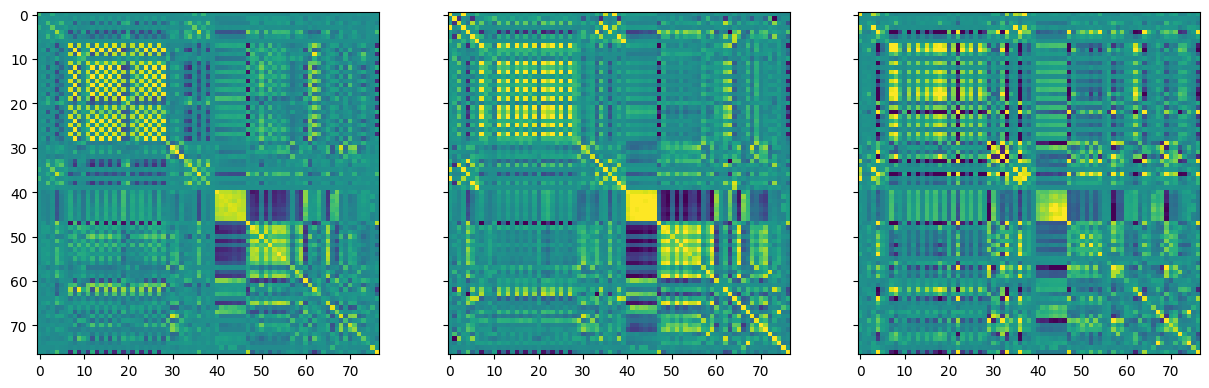

In [108]:
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)

fig.set_size_inches(15,5)

axs[0].imshow(np.cov(np.asarray(df_train_continuous.iloc[:500,:]).T), vmin=-1, vmax=1)

axs[1].imshow(np.cov(np.asarray(df_train_continuous.iloc[500:1000,:]).T), vmin=-1, vmax=1)

axs[2].imshow(np.cov(np.asarray(df_val_continuous).T), vmin=-1, vmax=1)



There appears to be a pretty significant amount of correlation. The correlation itself is moving in time, which presents something of a problem, but it seems like it mostly holds.

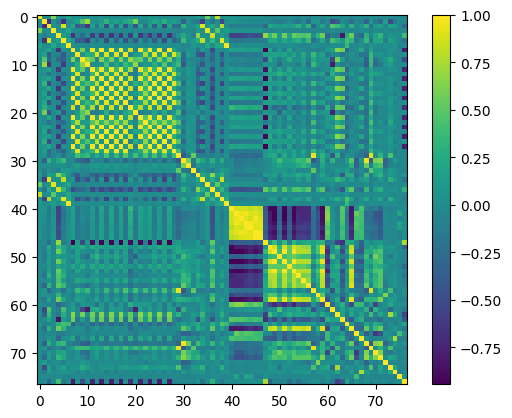

In [109]:
from sklearn.preprocessing import StandardScaler


plt.imshow(np.cov(np.asarray(df_train_continuous).T))
plt.colorbar()

Typically, one eliminates statistical correlations through PCA. However, a core question is how many PCA components to keep. To calculate this, what I'll do is see how many of the correlations emerge because they exist above the noise level.

In [110]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df_train_continuous.T))

scaled_data_shuffled = np.asarray(df_train_continuous).copy()

eigenvalues_shuffled = np.zeros((100, df_train_continuous.shape[1]))

import random

for r in range(100):
    for col in range(scaled_data_shuffled.shape[1]):
        scaled_data_shuffled[:,col] = scaled_data_shuffled[random.sample(range(scaled_data_shuffled.shape[0]), scaled_data_shuffled.shape[0]), 
                                                           col]
    eigenvalues_shuffled[r] = np.linalg.eig(
        np.cov(scaled_data_shuffled.T))[0]
    


/Users/hiroku007/Documents/trailstone_assessment/env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'eigenmode')

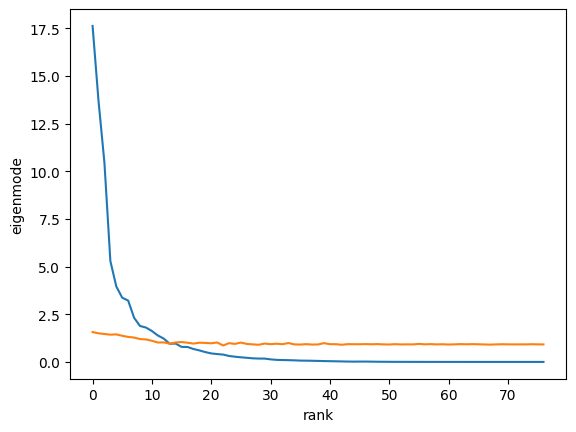

In [111]:
plt.plot(eigenvalues)
plt.plot(np.mean(eigenvalues_shuffled, axis=0))
plt.xlabel('rank')
plt.ylabel('eigenmode')

In [112]:
np.where(np.greater(np.mean(eigenvalues_shuffled, axis=0), eigenvalues))

(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]),)

It looks like only about 13 components really sit above the noise level. However, this statement relies on several assumptions about gaussianity. It's probably an okay initial approximation, but I suspect there might be a means of extracting information from the 'lower modes'. For now, I'll just go forward with PCA projection.

In [113]:
from sklearn.decomposition import PCA

pca_data = PCA(n_components=np.where(np.greater(np.mean(eigenvalues_shuffled, axis=0), eigenvalues))[0][0])

pca_data.fit(np.asarray(df_train_continuous))

pcaed_df_train_continuous = pca_data.transform(np.asarray(df_train_continuous))

pcaed_df_val_continuous = pca_data.transform(np.asarray(df_val_continuous))

pcaed_df_test_continuous = pca_data.transform(np.asarray(df_test_continuous))

In [114]:
pcaed_df_train = np.concatenate((pcaed_df_train_continuous, df_train_categorical), axis=1)

pcaed_df_val = np.concatenate((pcaed_df_val_continuous, df_val_categorical), axis=1)

pcaed_df_test = np.concatenate((pcaed_df_test_continuous, df_test_categorical), axis=1)


In [115]:
pcaed_df_val

array([[  3.0334877 ,  -3.31118167,  -6.9134988 , ...,   0.        ,
          0.        ,   0.        ],
       [  1.94863326,  -2.44852013,  -6.83682482, ...,   0.        ,
          0.        ,   0.        ],
       [  1.91903126,  -2.51998898,  -6.83128147, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ -3.19005216, -11.69660042,  -5.50573592, ...,   0.        ,
          0.        ,   0.        ],
       [ -1.37977622, -12.60016452,  -4.27939725, ...,   0.        ,
          0.        ,   0.        ],
       [ -1.77250846, -11.93492639,  -5.003388  , ...,   0.        ,
          0.        ,   0.        ]])

In [116]:
pcaed_df_train = pd.DataFrame(pcaed_df_train)
pcaed_df_test = pd.DataFrame(pcaed_df_test)
pcaed_df_val = pd.DataFrame(pcaed_df_val)

pcaed_df_train['target']=df_train[4].values
pcaed_df_test['target']=df_test[4].values
pcaed_df_val['target']=df_val[4].values


In [117]:
pcaed_df_test['target']

0     -3.82
1     -3.32
2     -3.78
3     -5.61
4     -6.46
       ... 
299   -0.70
300   -0.70
301   -0.70
302   -0.17
303   -0.06
Name: target, Length: 304, dtype: float64

In [118]:
print(pcaed_df_train.shape)
print(pcaed_df_test.shape)
print(pcaed_df_val.shape)
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(1061, 32)
(304, 32)
(152, 32)
(1061, 97)
(304, 97)
(152, 97)


In [119]:
from typing import Any
from typing import Dict
from typing import List
from typing import Optional
from typing import Tuple

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


import os
import math

from sklearn.model_selection import train_test_split

In [120]:
train_mean = pcaed_df_train.mean()
train_std = pcaed_df_train.std()

train_df = (pcaed_df_train - train_mean) / train_std
val_df = (pcaed_df_val - train_mean) / train_std
test_df = (pcaed_df_test - train_mean) / train_std




In [113]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

So I played with a few models, but notably, the best one that worked was LSTM. To give a quick idea of what I tried - convolutional, feed forward dense nets, and some multilayer networks. But a 2 layer LSTM seemed to work best. To identify exactly what kind of net to work with, I'll quickly just do a bit of a hyper parameter sweep. I didn't really want to spend too long on this though, so I only sampled some of the space.

Ultimately, I'll select the model parameters on the basis of the best holdings return on the validation set.

That said, how should one calculate bet sizing here? I will provide a simple solution here, but there's a longer conversation to be had

In [122]:
from support_classes import *

In [123]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,0.809718,-1.155273,-0.570096,1.418963,-0.420340,-0.298023,0.370695,0.735915,-0.360935,1.498907,...,-0.506820,2.006150,-1.162444,0.828346,-0.448771,-0.102305,-0.53168,-0.460837,4.274771,0.584740
1,1.317078,-1.385466,-0.374383,0.802259,-0.569220,0.283518,1.302837,0.786843,-0.005686,0.920692,...,-0.506820,-0.497997,-1.162444,0.828346,-0.448771,-0.102305,-0.53168,-0.460837,4.274771,0.549921
2,1.314655,-1.300487,-0.391793,0.790445,-0.443331,0.745103,0.750089,0.236754,0.218768,1.210662,...,-0.506820,-0.497997,-1.162444,0.828346,-0.448771,-0.102305,-0.53168,-0.460837,4.274771,0.534998
3,1.296834,-1.258158,-0.369755,0.666505,-0.291758,1.246669,0.342770,-0.028042,0.473092,1.288793,...,-0.506820,-0.497997,-1.162444,0.828346,-0.448771,-0.102305,-0.53168,-0.460837,-0.233710,0.534998
4,1.328966,-1.231165,-0.352218,0.594210,-0.325693,1.107284,1.010546,0.154159,0.195855,1.199438,...,1.971227,-0.497997,-1.162444,0.828346,-0.448771,-0.102305,-0.53168,-0.460837,4.274771,0.554895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,0.869071,-0.943635,-1.902770,-0.418325,2.268323,-1.297392,-0.144993,0.868427,1.285433,-0.353712,...,-0.506820,-0.497997,0.859446,0.828346,2.226207,-0.102305,-0.53168,-0.460837,-0.233710,0.256447
1057,0.724768,-0.888097,-2.043258,-0.217194,2.225166,-1.705310,-0.226151,0.468743,1.168289,0.022770,...,-0.506820,-0.497997,0.859446,0.828346,2.226207,-0.102305,-0.53168,-0.460837,-0.233710,0.251473
1058,0.571820,-0.742220,-2.023599,-0.388081,1.975661,-1.294512,-0.796344,-0.369903,0.944038,0.492476,...,1.971227,-0.497997,0.859446,0.828346,2.226207,-0.102305,-0.53168,-0.460837,-0.233710,0.321111
1059,0.500934,-0.695578,-2.019808,-0.526429,1.639889,-1.534195,-0.629279,-0.529888,0.337621,0.501049,...,-0.506820,2.006150,0.859446,0.828346,2.226207,-0.102305,-0.53168,-0.460837,-0.233710,0.355929


In [124]:
wide_window

NameError: name 'wide_window' is not defined

In [125]:
wide_window.train

NameError: name 'wide_window' is not defined

In [129]:
sum(df_test[0])

9.07

In [130]:
from IPython.display import clear_output

val_holdings_winnings_2 = np.zeros((10,7,10))

val_rsquared_2 = np.zeros((10,7,10))
for r in range(10):
    for lags in range(1,5):
        for lstm_size in range(4):
            wide_window = WindowGenerator(
                input_width=lags, label_width=lags, shift=1,
                label_columns=['target'], train_df=train_df, val_df=val_df, test_df=test_df)
            lstm_model = tf.keras.models.Sequential([
            # Shape [batch, time, features] => [batch, time, lstm_units]
                tf.keras.layers.LSTM(2**(lstm_size+5), return_sequences=True),
                tf.keras.layers.LSTM(2**(lstm_size+5), return_sequences=True),
                # Shape => [batch, time, features]
                tf.keras.layers.Dense(units=1)
            ])
            history = compile_and_fit(lstm_model, wide_window)

            test_prediction = lstm_model.predict(wide_window.make_dataset(test_df, False, test_df.shape[0]))
            train_prediction = lstm_model.predict(wide_window.make_dataset(train_df, False, train_df.shape[0]))
            val_prediction = lstm_model.predict(wide_window.make_dataset(val_df, False, val_df.shape[0]))

            val_predictions_collated = np.zeros(val_df.shape[0])
            j=0
            for i in range(val_df.shape[0]):

                if i<val_prediction.shape[0]:
                    val_predictions_collated[i] = val_prediction[i,0,0]
                else:
                    val_predictions_collated[i] = val_prediction[-1, j,0]
                    j+=1
                    
            
            

            returns = np.zeros(len(np.arange(-1,1,0.01)))
            for index, cutoff in enumerate(np.arange(-1,1,0.01)):
                holdings = (np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float)-1/2)*2
                returns[index] = sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

            
            #val_rsquared_2[lags-1,lstm_size, r] = 1 - np.sum((val_predictions_collated-val_df['target'])**2)/np.sum((np.mean(val_df['target'])-val_df['target'])**2)
            holdings = (np.asarray(np.diff(val_predictions_collated)>0, dtype=float)-1/2)*2
            
            val_holdings_winnings_2[lags-1,lstm_size, r] = max(returns)
            clear_output(wait=True)
            print(np.mean(val_holdings_winnings_2, axis=2))

        

[[0.17666743 0.19940408 0.1974788  0.22126977 0.         0.
  0.        ]
 [0.19344488 0.16016502 0.21132248 0.21072656 0.         0.
  0.        ]
 [0.15833142 0.17740087 0.18184735 0.19023608 0.         0.
  0.        ]
 [0.19165712 0.18954848 0.16630759 0.17469631 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


Text(0, 0.5, 'Lags')

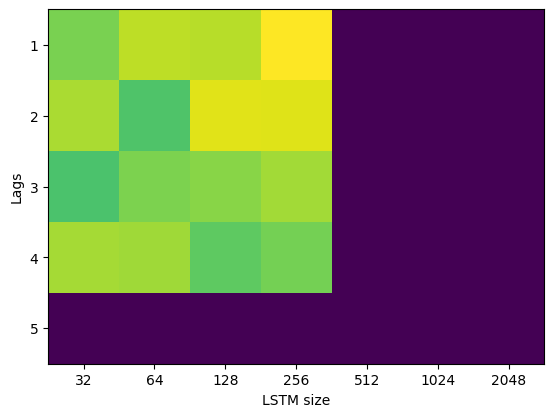

In [131]:
plt.imshow(np.mean(val_holdings_winnings_2[:5,:,:], axis=2))
plt.xticks([0,1,2,3,4,5,6], [32,64,128,256,512,1024,2048])
plt.yticks([0,1,2,3,4], [1,2,3,4,5])
plt.xlabel('LSTM size')
plt.ylabel('Lags')

In [1]:
wide_window

NameError: name 'wide_window' is not defined

In [279]:
sum(holdings[:holdings.shape[0]] * df_val[0][1:])/sum(abs(df_val[0][1:]))

ValueError: operands could not be broadcast together with shapes (303,) (151,) 

It appears as though layers of size 2048 with 2 lags seems to be best. But on to bet sizing!

1/1 [==============================] - 0s 410ms/step
0.1199222889438362


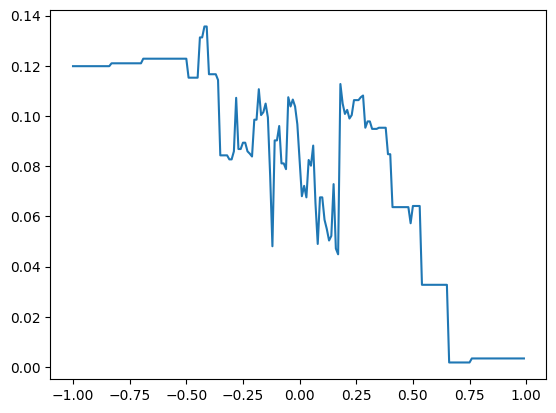

In [349]:
for r in range(1): 
    wide_window = WindowGenerator(
                    input_width=20, label_width=20, shift=1,
                    label_columns=['target'], train_df=train_df, val_df=val_df, test_df=test_df)

    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
            tf.keras.layers.LSTM(1024, return_sequences=True),
            tf.keras.layers.LSTM(1024, return_sequences=True),
            # Shape => [batch, time, features]
            tf.keras.layers.Dense(units=1)
        ])
    history = compile_and_fit(lstm_model, wide_window)


    clear_output(wait=True)
    test_prediction = lstm_model.predict(wide_window.make_dataset(test_df, False, test_df.shape[0]))
    train_prediction = lstm_model.predict(wide_window.make_dataset(train_df, False, train_df.shape[0]))
    val_prediction = lstm_model.predict(wide_window.make_dataset(val_df, False, val_df.shape[0]))
    

    train_predictions_collated = np.zeros(train_df.shape[0])
    j=0
    for i in range(train_df.shape[0]):

        if i<train_prediction.shape[0]:
            train_predictions_collated[i] = train_prediction[i,0,0]
        else:
            train_predictions_collated[i] = train_prediction[-1, j,0]
            j+=1 

    test_predictions_collated = np.zeros(test_df.shape[0])
    j=0
    for i in range(test_df.shape[0]):

        if i<test_prediction.shape[0]:
            test_predictions_collated[i] = test_prediction[i,0,0]
        else:

            test_predictions_collated[i] = test_prediction[-1, j,0]
            j+=1

    val_predictions_collated = np.zeros(val_df.shape[0])
    j=0
    for i in range(val_df.shape[0]):

        if i<val_prediction.shape[0]:
            val_predictions_collated[i] = val_prediction[i,0,0]
        else:
            val_predictions_collated[i] = val_prediction[-1, j,0]
            j+=1

    returns = np.zeros(len(np.arange(-1,1,0.01)))
    for index, cutoff in enumerate(np.arange(-1,1,0.01)):
        
        up_or_down = 2*np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float)-1
        
        
        
        holdings = (np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float))
        
        
        
        returns[index] = sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

    max_return_point = np.where(returns==max(returns))[0][0]
    
    holdings = (np.asarray(np.diff(test_predictions_collated)>cutoffs[max_return_point], dtype=float))

    print(sum(holdings[:holdings.shape[0]-1] * df_test[0][2:])/np.sum(abs(df_test[0][2:])))
    plt.plot(np.arange(-1,1,0.01), returns)

In [325]:
    holdings = (np.asarray(np.diff(test_predictions_collated)>-0.5, dtype=float)-1/2)*2

    print(sum(holdings[:holdings.shape[0]-1] * df_test[0][2:])/np.sum(abs(df_test[0][2:])))

0.09184033910279063


In [327]:
sum(df_test[0])/sum(abs(df_test[0]))

0.15826208340603748

In [328]:
predictions_of_returns = val_predictions_collated - df_val[4]

In [329]:
predictions_of_returns

1061   -0.385538
1062   -0.287520
1063   -0.176204
1064   -0.352841
1065   -0.307606
          ...   
1208    3.456100
1209    3.308649
1210    2.709304
1211    2.671055
1212    2.111055
Name: 4, Length: 152, dtype: float64

array([[1.        , 0.02884798],
       [0.02884798, 1.        ]])

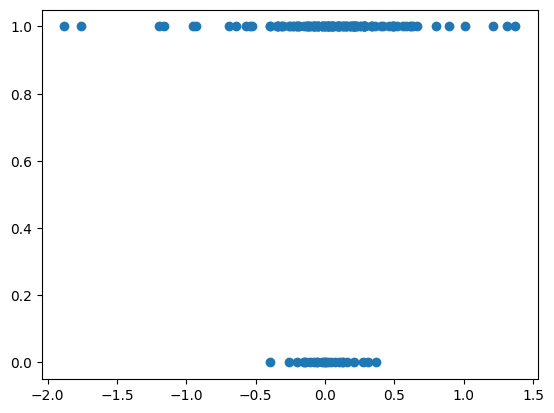

In [330]:
plt.scatter(df_val[0][1:], predictions_of_returns[:-1]>0)
np.corrcoef(df_val[0][1:], predictions_of_returns[:-1]>0)

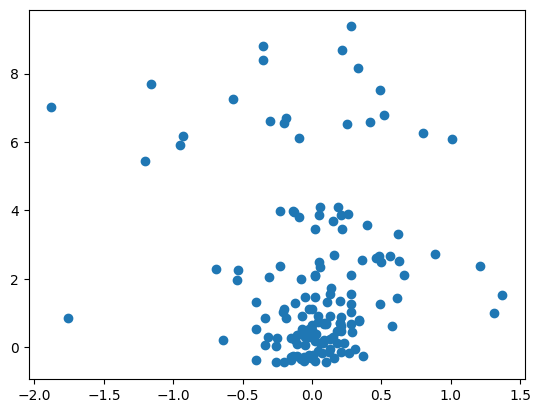

In [331]:
plt.scatter(df_val[0][1:], predictions_of_returns[:-1])

In [332]:
np.where(returns>0.13)

(array([50, 52, 53, 54, 55, 56, 93]),)

In [333]:
max_return_point

93

In [334]:
holdings_1 = 2*(np.asarray(np.diff(test_predictions_collated)>cutoffs[47], dtype=float)) - 1

holdings_2 = 2*(np.asarray(np.diff(test_predictions_collated)>cutoffs[67], dtype=float)) - 1

In [335]:
holdings = (holdings_1 + holdings_2)/2

In [336]:
print(sum(holdings[:holdings.shape[0]-1] * df_test[0][2:])/np.sum(abs(df_test[0][2:])))

0.07382550335570451


In [337]:
holdings = (np.asarray(np.diff(test_predictions_collated)>0, dtype=float))*2
print(sum(holdings[:holdings.shape[0]-1] * df_test[0][2:])/np.sum(abs(df_test[0][2:])))
print(sum(holdings[:holdings.shape[0]] * df_test[0][1:])/np.sum(abs(df_test[0][1:])))


0.27092900035323264
0.5178571428571416


In [338]:
np.diff(val_predictions_collated).s

AttributeError: 'numpy.ndarray' object has no attribute 's'

array([[1.        , 0.06203529],
       [0.06203529, 1.        ]])

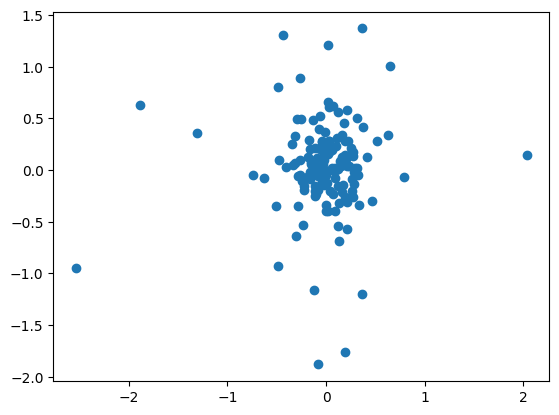

In [339]:
plt.scatter(np.diff(val_predictions_collated)[:150], df_val[0][2:])
np.corrcoef(np.diff(val_predictions_collated)[:150], df_val[0][2:])

In [340]:
df_val.shape

(152, 97)

In [341]:
test_prediction = lstm_model.predict(wide_window.make_dataset(test_df, False, test_df.shape[0]))
train_prediction = lstm_model.predict(wide_window.make_dataset(train_df, False, train_df.shape[0]))
val_prediction = lstm_model.predict(wide_window.make_dataset(val_df, False, val_df.shape[0]))


1/1 [==============================] - 0s 52ms/step


In [342]:
lstm_model.summary()

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_400 (LSTM)             (None, 1, 1024)           4329472   
                                                                 
 lstm_401 (LSTM)             (None, 1, 1024)           8392704   
                                                                 
 dense_200 (Dense)           (None, 1, 1)              1025      
                                                                 
Total params: 12,723,201
Trainable params: 12,723,201
Non-trainable params: 0
_________________________________________________________________


In [343]:
train_predictions_collated.shape

(1061,)

(600.0, 700.0)

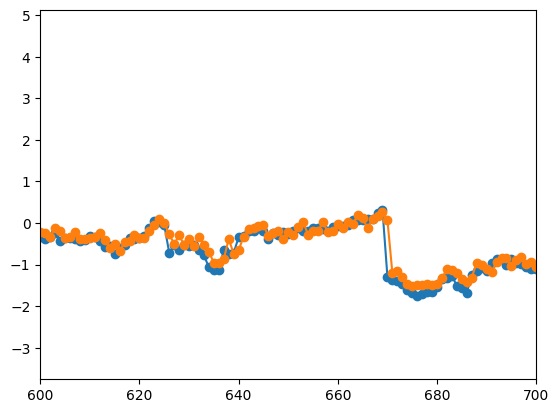

In [344]:
plt.plot(np.asarray(train_df['target'][1:]), marker='o')
plt.plot(np.asarray(train_predictions_collated), marker='o')
plt.xlim(600,700)

In [345]:
train_predictions_collated = np.zeros(train_df.shape[0])
j=0
for i in range(train_df.shape[0]):

    if i<train_prediction.shape[0]:
        train_predictions_collated[i] = train_prediction[i,0,0]
    else:
        train_predictions_collated[i] = train_prediction[-1, j,0]
        j+=1 

test_predictions_collated = np.zeros(test_df.shape[0])
j=0
for i in range(test_df.shape[0]):

    if i<test_prediction.shape[0]:
        test_predictions_collated[i] = test_prediction[i,0,0]
    else:

        test_predictions_collated[i] = test_prediction[-1, j,0]
        j+=1

val_predictions_collated = np.zeros(val_df.shape[0])
j=0
for i in range(val_df.shape[0]):

    if i<val_prediction.shape[0]:
        val_predictions_collated[i] = val_prediction[i,0,0]
    else:
        val_predictions_collated[i] = val_prediction[-1, j,0]
        j+=1

So if my model was perfect and could predict exactly, my solution would be simple. Just hold 1 on days where I exist $df[4][t] - df[4][t-1]>0$ and -1 otherwise. In fact, in this analysis, this is basically what I did. However, a more clever thing I could do would be to try to correlate the probability of going up or down as a function of the regressor's change in price at each time step. That is, when the model predicts large increases, does that mean it is more confident about the direction of the price? I explored this briefly, but only observed that my predictions improved from 65% accurate to 75% specifically for upward movements. For downward movements, it seems to not make much of a difference

In [346]:
returns = np.zeros(len(np.arange(-1,1,0.01)))
for index, cutoff in enumerate(np.arange(-1,1,0.01)):
    holdings = (np.asarray(np.diff(val_predictions_collated)>cutoff, dtype=float)-1/2)*2
    returns[index] = sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

In [347]:
max_return_point = np.where(returns==max(returns))[0][0]

In [348]:
predicted_differences = np.diff(val_predictions_collated)

print(classification_report((df_val[0]>0)[2:], predicted_differences[:predicted_differences.shape[0]-1]>cutoffs[max_return_point]))

              precision    recall  f1-score   support

       False       0.50      0.41      0.45        66
        True       0.59      0.68      0.63        84

    accuracy                           0.56       150
   macro avg       0.55      0.54      0.54       150
weighted avg       0.55      0.56      0.55       150



In [247]:
print(classification_report((df_val[0]>0)[2:], predicted_differences[:predicted_differences.shape[0]-1]>-0.1))

              precision    recall  f1-score   support

       False       0.50      0.35      0.41        66
        True       0.59      0.73      0.65        84

    accuracy                           0.56       150
   macro avg       0.54      0.54      0.53       150
weighted avg       0.55      0.56      0.54       150



In [248]:
print(classification_report((df_val[0]>0)[2:], predicted_differences[:predicted_differences.shape[0]-1]>-0.2))

              precision    recall  f1-score   support

       False       0.45      0.21      0.29        66
        True       0.56      0.80      0.66        84

    accuracy                           0.54       150
   macro avg       0.51      0.50      0.47       150
weighted avg       0.51      0.54      0.50       150



In [249]:
print(classification_report((df_val[0]>0)[2:], predicted_differences[:predicted_differences.shape[0]-1]>-0.3))

              precision    recall  f1-score   support

       False       0.42      0.12      0.19        66
        True       0.56      0.87      0.68        84

    accuracy                           0.54       150
   macro avg       0.49      0.50      0.43       150
weighted avg       0.50      0.54      0.46       150



In [311]:
predicted_differences = np.diff(test_predictions_collated)

print(classification_report((df_test[0]>0)[2:], predicted_differences[:predicted_differences.shape[0]-1]>cutoffs[max_return_point]))

              precision    recall  f1-score   support

       False       0.33      0.01      0.03       139
        True       0.54      0.98      0.69       163

    accuracy                           0.53       302
   macro avg       0.44      0.49      0.36       302
weighted avg       0.44      0.53      0.39       302



In [251]:
print(classification_report((df_test[0]>0)[1:], (np.diff(test_predictions_collated)>0.4)))

              precision    recall  f1-score   support

       False       0.47      0.98      0.63       139
        True       0.73      0.05      0.09       164

    accuracy                           0.48       303
   macro avg       0.60      0.51      0.36       303
weighted avg       0.61      0.48      0.34       303



In [252]:
print(classification_report((df_test[0]<0)[1:], (np.diff(test_predictions_collated)<-0.1)))

              precision    recall  f1-score   support

       False       0.62      0.83      0.71       171
        True       0.61      0.34      0.44       132

    accuracy                           0.62       303
   macro avg       0.61      0.59      0.57       303
weighted avg       0.61      0.62      0.59       303



So for now, I'll do the naive thing and hope my predictor is just 100% accurate. But with more time, I'd explore some other bet sizing strategies

In [253]:
holdings = (np.asarray(np.diff(train_predictions_collated)>0.2, dtype=float)-1/2)*2
sum(holdings[:holdings.shape[0]-1] * df_train[0][2:])/sum(abs(df_train[0][2:]))

0.14038202851762208

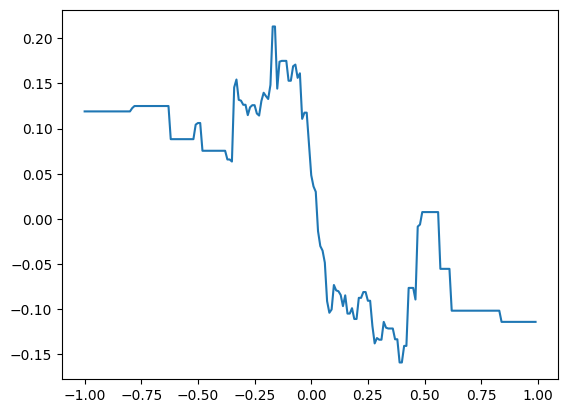

In [254]:
plt.plot(np.arange(-1,1,0.01), returns)

In [260]:
cutoffs = np.arange(-1,1,0.01)

holdings = (np.asarray(np.diff(val_predictions_collated)>cutoffs[max_return_point], dtype=float)-1/2)*2
sum(holdings[:holdings.shape[0]-1] * df_val[0][2:])/sum(abs(df_val[0][2:]))

0.21292688517075256

In [264]:
holdings = (np.asarray(np.diff(test_predictions_collated)>cutoffs[max_return_point]-1/2, dtype=float))*2

In [265]:
sum(holdings[:holdings.shape[0]-1] * df_test[0][2:])/np.sum(abs(df_test[0][2:]))

0.28364535499823396

In [179]:
np.sum(abs(df_test[0][1:]))

57.119999999999976

Text(0.5, 1.0, '0.9476266943508875')

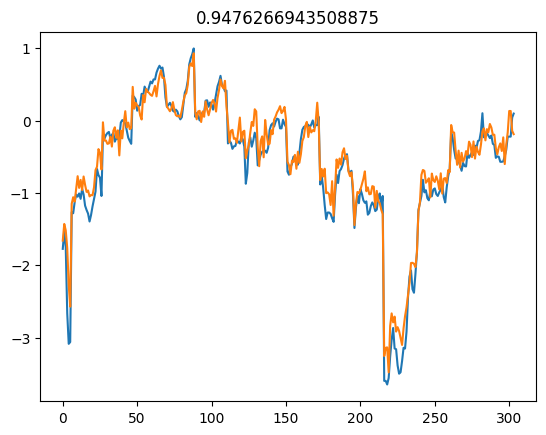

In [461]:
plt.plot(np.asarray(test_df['target']))
plt.plot(np.asarray(test_predictions_collated))
rsquared = 1 - np.sum((test_predictions_collated-test_df['target'])**2)/np.sum((np.mean(test_df['target'])-test_df['target'])**2)
plt.title(rsquared)

Conclusions:

- This problem seemed like it was best solved by focusing more on predicting df[4] rather than df[0]. 
- This problem seemed like there was a possibility for rewriting the model as a function of a sum of sine waves. However, I probably need to update the weights on each waveform as a function of time, which could become a fairly complicated prediction in and of itself. However, this model would be highly interpretable, which seems desirable.
- The model can be fit pretty easily with an LSTM. If I had a more powerful computer with a GPU, I'd try models with larger layer sizes, but we already have something like 200 million parameters, which FAR exceeds the number of data points we have. So I'm not enthusiastic about trying even larger models. 


Things to do:
- Improve bet sizing strategy
- try for a model that is based on fourier decompositions
- explore 1/f noise more carefully and see if there's some straightforward origin to it that can be exploited